# Plot Results for CheckList

In this notebook, we plot the error rates and the overlap ratio in boxplots for both the vanilla and SWA models. 
We also calculate the Fleiss' Kappa values for each capability and compare the results between the two model types. 

## Import and Load

In [1]:
from pathlib import Path
import json
from itertools import combinations

def flat(l):
    if l and isinstance(l[0], list):
        return [y for x in l for y in x]
    return l

def load_json_file(file_path): 
    with open(file_path, "r") as f: 
        file = json.load(f)
        
    return file 

rs0 = ("Random Seed 0", load_json_file("results/checklist/rs0_shuffle_train_6_testset_19_07_21.json"))
rs0_swa = ("Random Seed 0 SWA", load_json_file("results/checklist/rs0-swa-linear-60-start2-drop-shuffle_7_testset_19_07_21.json"))
rs1 = ("Random Seed 1", load_json_file("results/checklist/rs1_shuffle_train_2_testset_19_07_21.json"))
rs1_swa = ("Random Seed 1 SWA", load_json_file("results/checklist/rs1_rs1-swa-linear-75-start2-drop-shuffle_4_testset_19_07_21.json"))
rs2 = ("Random Seed 2", load_json_file("results/checklist/rs2-shuffle-train_5_testset_19_07_21.json"))
rs2_swa = ("Random Seed 2 SWA", load_json_file("results/checklist/rs2-swa-linear-60-start2-drop-shuffle_4_testset_19_07_21.json"))
rs3 = ("Random Seed 3", load_json_file("results/checklist/rs3-shuffle-train_1_testset_19_07_21.json"))
rs3_swa = ("Random Seed 3 SWA", load_json_file("results/checklist/rs3-swa-linear-60-start2-drop-shuffle_8_testset_19_07_21.json"))
rs4 = ("Random Seed 4", load_json_file("results/checklist/rs4-shuffle-train_1_testset_19_07_21.json"))
rs4_swa = ("Random Seed 4 SWA", load_json_file("results/checklist/rs4-swa-linear-75-start2-drop-shuffle_6_testset_19_07_21.json"))
rs5 = ("Random Seed 5", load_json_file("results/checklist/rs5-shuffle-train_4_testset_19_07_21.json"))
rs5_swa = ("Random Seed 5 SWA", load_json_file("results/checklist/rs5-swa-linear-60-start2-drop-shuffle_3_testset_19_07_21.json"))
rs6 = ("Random Seed 6", load_json_file("results/checklist/rs6-shuffle-train_2_testset_19_07_21.json"))
rs6_swa = ("Random Seed 6 SWA", load_json_file("results/checklist/rs6-swa-linear-60-start2-drop-shuffle_7_testset_19_07_21.json"))
rs7 = ("Random Seed 7", load_json_file("results/checklist/rs7-shuffle-train_2_testset_19_07_21.json"))
rs7_swa = ("Random Seed 7 SWA", load_json_file("results/checklist/rs7-swa-linear-60-start2-drop-shuffle_6_testset_19_07_21.json"))
rs8 = ("Random Seed 8", load_json_file("results/checklist/rs8-shuffle-train_3_testset_19_07_21.json"))
rs8_swa = ("Random Seed 8 SWA", load_json_file("results/checklist/rs8-swa-linear-60-start2-drop-shuffle_4_testset_19_07_21.json"))
rs9 = ("Random Seed 9", load_json_file("results/checklist/rs9-shuffle-train_4_testset_19_07_21.json"))
rs9_swa = ("Random Seed 9 SWA", load_json_file("results/checklist/rs9-swa-linear-75-start2-drop-shuffle_6_testset_19_07_21.json"))

In [2]:
# Fix naming of CheckList capabilities for clarity on plots.
keys_to_names = {
    "Movie sentiments": "Movie Sentiments", 
    "Single positive words": "Single Positive Words", 
    "Single negative words": "Single Negative Words", 
    "Sentiment-laden words in context": "Sentiment-laden Words in Context", 
    "add positive phrases": "Add Positive Phrases", 
    "add negative phrases": "Add Negative Phrases", 
    "Simple negations: negative": "Negation of Positive Sentences",
    "Simple negations: not negative": "Negation of Negative Sentences",
    "Hard: Negation of positive with neutral stuff in the middle (should be negative)": "Negation of Positive, neutral words in the middle", 
    "Movie genre specific sentiments": "Movie Genre Specific Sentiments", 
    "Change names": "Change Names", 
    "Polarizing Negative Names - Positive Instances": "Negative Names - Positive Instances", 
    "Polarizing Positive Names - Negative Instances": "Positive Names - Negative Instances", 
    "Polarizing Negative Names - Negative Instances": "Negative Names - Negative Instances", 
    "Polarizing Positive Names - Positive Instances": "Positive Names - Positive Instances", 
    "change locations": "Change Locations", 
    "change neutral words with BERT": "Change Neutral Words", 
    "Add negations": "Add Negations", 
    "used to, but now": "Temporal Sentiment Change", 
    "Change Movie Industries": "Change Movie Industries",
    "Movie Industries specific sentiments": "Movie Industries Sentiments"
}

In [3]:
all_models = [rs0, rs0_swa, rs1, rs1_swa, rs2, rs2_swa, rs3, rs3_swa, rs4, rs4_swa, rs5, rs5_swa, rs6, rs6_swa, rs7, rs7_swa, rs8, rs8_swa, rs9, rs9_swa, ensemble]
model_to_tests_failure_rates = {}

for (name, results) in all_models: 
    model_to_tests_failure_rates[name] = {k: v["stats"]["fail_rate"] for (k, v) in results.items()}
    
model_to_tests_failure_rates

{'Random Seed 0': {'Movie sentiments': 0.0,
  'Single positive words': 0.0,
  'Single negative words': 0.0,
  'Sentiment-laden words in context': 0.8888888888888888,
  'add positive phrases': 0.6,
  'add negative phrases': 4.0,
  'Simple negations: negative': 17.77777777777778,
  'Hard: Negation of positive with neutral stuff in the middle (should be negative)': 91.8,
  'Movie genre specific sentiments': 5.298913043478261,
  'Change names': 7.482993197278912,
  'Polarizing Negative Names - Positive Instances': 10.828025477707007,
  'Polarizing Positive Names - Negative Instances': 15.447154471544716,
  'Polarizing Negative Names - Negative Instances': 17.88617886178862,
  'Polarizing Positive Names - Positive Instances': 7.006369426751593,
  'Change Movie Industries': 16.666666666666668,
  'Movie Industries specific sentiments': 0.16666666666666666,
  'change neutral words with BERT': 9.4,
  'used to, but now': 23.559479553903344},
 'Random Seed 0 SWA': {'Movie sentiments': 0.0,
  'Sin

## Plots

### Plot Error Rates of Vanilla Models per CheckList capability
We plot the error rates of each vanilla random seed per CheckList capability with a barplot. 

Text(0.5, 1.0, 'Error Rates of Capabilities per Model')

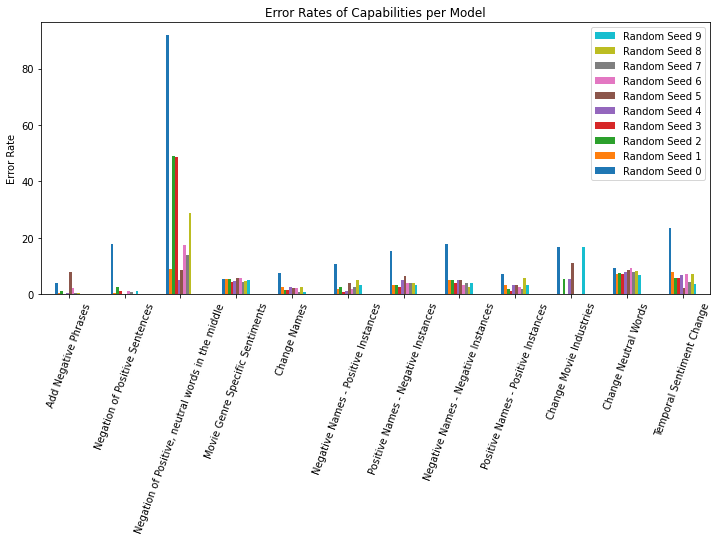

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

np.random.seed(2019)

non_swa_version = {k: {keys_to_names[v_k]: v_v for (v_k, v_v) in v.items()} for (k, v) in model_to_tests_failure_rates.items() if "SWA" not in k and "Ensemble" not in k}

df = pd.DataFrame(non_swa_version)
index = df.columns

# Plot
ax = pd.concat([df[5:-3], df[-2:]]).plot.bar(rot=0, figsize=(12, 5))

handles, labels = ax.get_legend_handles_labels()
    
ax.legend(reversed(handles), reversed(labels), loc="upper right")
plt.xticks(rotation=70)
ax.set_ylabel("Error Rate")
ax.set_title("Error Rates of Capabilities per Model")
# plt.savefig("checklist_error_vanilla_10rs.eps", format="eps", bbox_inches='tight')

### Plot Error Rates of Vanilla Models without Random Seed 0
We modify the layout of the plot by changing the x-labels and mapping it to the legend which we plot as well. 

Text(0.5, 1.0, 'Error Rates of Capabilities per Model')

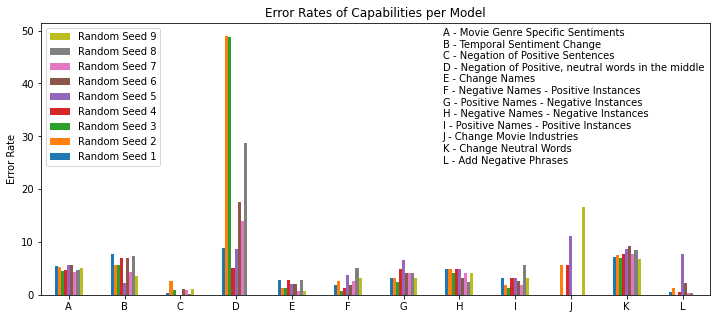

In [6]:
# https://stackoverflow.com/questions/62941033/how-to-turn-x-axis-values-into-a-legend-for-matplotlib-bar-graph
import string

np.random.seed(2019)

non_swa_version = {k: {keys_to_names[v_k]: v_v for (v_k, v_v) in v.items()} for (k, v) in model_to_tests_failure_rates.items() if "SWA" not in k and "Ensemble" not in k and "0" not in k}

order = [
    "Movie Genre Specific Sentiments" , 
    "Temporal Sentiment Change", 
    "Negation of Positive Sentences", 
    "Negation of Positive, neutral words in the middle", 
    "Change Names", 
    "Negative Names - Positive Instances", 
    "Positive Names - Negative Instances", 
    "Negative Names - Negative Instances",
    "Positive Names - Positive Instances",
    "Change Movie Industries", 
    "Change Neutral Words",
    "Add Negative Phrases"
]

df = pd.DataFrame(non_swa_version)
index = df.columns

# Plot
new_df = df.reindex(order)
ax = new_df.plot.bar(rot=0, figsize=(12, 5))

handles, labels = ax.get_legend_handles_labels()

x_legend = '\n'.join(f'{string.ascii_uppercase[n]} - {name}' for n, name in enumerate(new_df.index))
t = ax.text(0.59, 0.49, x_legend, transform=ax.figure.transFigure)
plt.subplots_adjust()
ax.set_xticklabels([string.ascii_uppercase[i] for i in range(len(new_df.index))])
    
ax.legend(reversed(handles), reversed(labels), loc="upper left")
ax.set_ylabel("Error Rate")
ax.set_title("Error Rates of Capabilities per Model")
# plt.savefig("checklist_error_vanilla_10rs_w0_legend2.eps", format="eps", bbox_inches='tight')

### Plot Error Rates of SWA Models per CheckList capability
We plot the error rates of each SWA random seed per CheckList capability with a barplot. 

Text(0.5, 1.0, 'Error Rates of Capabilities per Model')

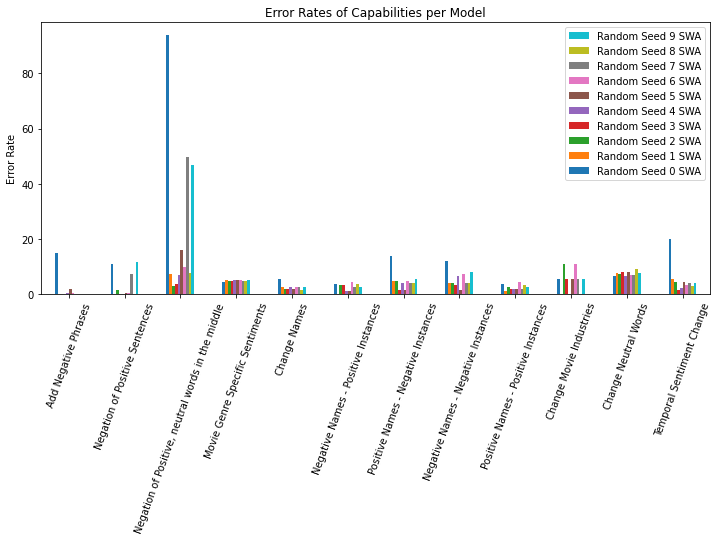

In [7]:
np.random.seed(2019)

swa_version = {k: {keys_to_names[v_k]: v_v for (v_k, v_v) in v.items()} for k, v in model_to_tests_failure_rates.items() if "SWA" in k and "Ensemble" not in k}

index = df.columns
df = pd.DataFrame(swa_version)

# Plot
ax = pd.concat([df[5:-3], df[-2:]]).plot.bar(rot=0, figsize=(12, 5))

handles, labels = ax.get_legend_handles_labels()
    
ax.legend(reversed(handles), reversed(labels), loc="upper right")
plt.xticks(rotation=70)
ax.set_ylabel("Error Rate")
ax.set_title("Error Rates of Capabilities per Model")
# plt.savefig("checklist_error_swa_10rs.eps", format="eps", bbox_inches='tight')

### Plot Error Rates of SWA Models without Random Seed 0
We modify the layout of the plot by changing the x-labels and mapping it to the legend which we plot as well. 

Text(0.5, 1.0, 'Error Rates of Capabilities per Model')

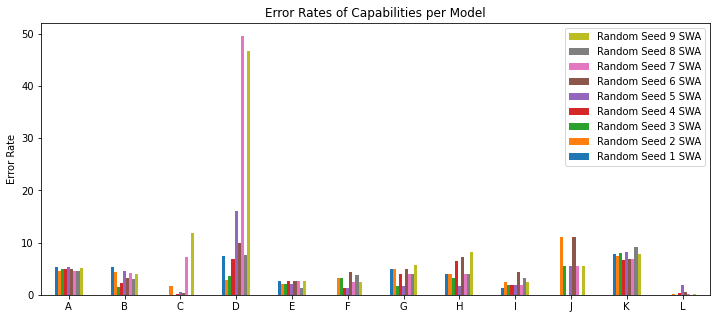

In [8]:
np.random.seed(2019)

swa_version = {k: {keys_to_names[v_k]: v_v for (v_k, v_v) in v.items()} for k, v in model_to_tests_failure_rates.items() if "SWA" in k and "Ensemble" not in k and "0" not in k}

index = df.columns
df = pd.DataFrame(swa_version)
new_df = df.reindex(order)

# Plot
ax = new_df.plot.bar(rot=0, figsize=(12, 5))

handles, labels = ax.get_legend_handles_labels()
    
ax.legend(reversed(handles), reversed(labels), loc="upper right")
ax.set_xticklabels([string.ascii_uppercase[i] for i in range(len(new_df.index))])
ax.set_ylabel("Error Rate")
ax.set_title("Error Rates of Capabilities per Model")
# plt.savefig("checklist_error_swa_10rs_w0_legend.eps", format="eps", bbox_inches='tight')

### Plot Spread of Error Rate of Vanilla and SWA models per CheckList capability
We use a boxplot to visualize and compare the spread of the error rates between the two model types, per CheckList capability. Outliers are indicated with a 'o'.

In [9]:
swa_models = [rs1_swa, rs2_swa, rs3_swa, rs4_swa, rs5_swa, rs6_swa, rs7_swa, rs8_swa, rs9_swa]
non_swa_models = [rs1, rs2, rs3, rs4, rs5, rs6, rs7, rs8, rs9]

Text(0, 0.5, 'Error Rate')

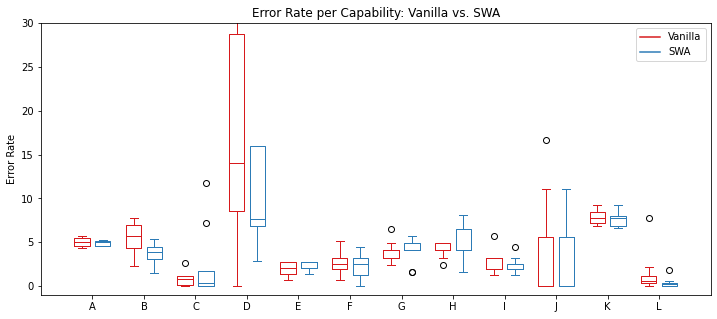

In [13]:
# https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
order = [
    "Movie genre specific sentiments" , 
    "used to, but now", 
    "Simple negations: negative", 
    "Hard: Negation of positive with neutral stuff in the middle (should be negative)", 
    "Change names", 
    "Polarizing Negative Names - Positive Instances", 
    "Polarizing Positive Names - Negative Instances", 
    "Polarizing Negative Names - Negative Instances",
    "Polarizing Positive Names - Positive Instances",
    "Change Movie Industries", 
    "change neutral words with BERT",
    "add negative phrases"
]

# all_keys = list(rs0[1].keys())[5:-3] + list(rs0[1].keys())[-2:]
# all_keys = rs0[1].keys()
all_keys = order
data_vanilla = [[non_swa[1][k]["stats"]["fail_rate"] for non_swa in non_swa_models] for k in all_keys]
data_swa = [[swa[1][k]["stats"]["fail_rate"] for swa in swa_models] for k in all_keys] 

# ticks = [keys_to_names[k] for k in all_keys]
ticks = [string.ascii_uppercase[i] for i in range(len(all_keys))]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(12, 5))

bpl = plt.boxplot(data_vanilla, positions=np.array(range(len(data_vanilla)))*2.0-0.4, widths=0.6)
bpr = plt.boxplot(data_swa, positions=np.array(range(len(data_swa)))*2.0+0.4, widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Vanilla')
plt.plot([], c='#2C7BB6', label='SWA')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(-1, 30)
plt.title("Error Rate per Capability: Vanilla vs. SWA")
plt.ylabel("Error Rate")

# plt.savefig("error_rate_boxplot_rs10.eps", format="eps", bbox_inches='tight')

### Plot Spread of Overlap Ratios of Vanilla and SWA models per CheckList capability
We first calculate the overlap ratios (on an instance-level) for each combination of models on each CheckList capability per model type. Then we visualize and compare the spread of the overlap ratios between the Vanilla and SWA models.

In [14]:
def get_overlap_ratios(models, test_keys, case_level=False): 
    overlap_ratios = []
    for k in test_keys:
        ratios_test = []
        model_combis = list(set(combinations(range(len(models)), 2)))
        for idx1, idx2 in model_combis: 
            model_1 = models[idx1]
            model_2 = models[idx2]

            model_1_failures = model_1[1][k]["failures"]
            model_2_failures = model_2[1][k]["failures"]

            if any(isinstance(x, list) for x in model_1_failures) or any(isinstance(x, list) for x in model_2_failures):
                fail_idxs_model_1 = [model_1[1][k]["samples"].index(fail) for fail in model_1_failures]
                fail_idxs_model_2 = [model_2[1][k]["samples"].index(fail) for fail in model_2_failures]
                
                if not case_level: 
                    if k == "add positive phrases" or k == "add negative phrases":                         
                        model_1_failures = []
                        model_2_failures = []
                        
                        for fail_idx in fail_idxs_model_1: 
                            wrong_idxs = list(np.where(np.array(model_1[1][k]["expect_results"][fail_idx]) != 1.0)[0])
                            for wrong_idx in wrong_idxs: 
                                model_1_failures.append(model_1[1][k]["samples"][fail_idx][wrong_idx])
                                
                        for fail_idx in fail_idxs_model_2: 
                            wrong_idxs = list(np.where(np.array(model_2[1][k]["expect_results"][fail_idx]) != 1.0)[0])
                            for wrong_idx in wrong_idxs: 
                                model_2_failures.append(model_2[1][k]["samples"][fail_idx][wrong_idx])
                    
                    else: 
                        model_1_failures = []
                        model_2_failures = []

                        for fail_idx in fail_idxs_model_1: 
                            fail_preds = model_1[1][k]["predictions"][fail_idx]
                            correct_pred = fail_preds[0]
                            wrong_preds = list(np.where(np.array(fail_preds) != correct_pred)[0])
                            for pred_idx in wrong_preds: 
                                model_1_failures.append(model_1[1][k]["samples"][fail_idx][pred_idx])

                        for fail_idx in fail_idxs_model_2: 
                            fail_preds = model_2[1][k]["predictions"][fail_idx]
                            correct_pred = fail_preds[0]
                            wrong_preds = list(np.where(np.array(fail_preds) != correct_pred)[0])
                            for pred_idx in wrong_preds: 
                                model_2_failures.append(model_2[1][k]["samples"][fail_idx][pred_idx])
                else:
                    model_1_failures = flat(model_1_failures)
                    model_2_failures = flat(model_2_failures)

            model_1_failures = set(model_1_failures)
            model_2_failures = set(model_2_failures)

            overlap = model_1_failures & model_2_failures
            union = model_1_failures | model_2_failures

            if len(model_1_failures) == 0 and len(model_1_failures) == 0: 
                continue
            
            ratio = 0.0
            if len(union) > 0:
                ratio = len(overlap) / len(union)
            ratios_test.append(ratio)
        overlap_ratios.append(ratios_test)
        
    return overlap_ratios
    
swa_models = [rs1_swa, rs2_swa, rs3_swa, rs4_swa, rs5_swa, rs6_swa, rs7_swa, rs8_swa, rs9_swa]
non_swa_models = [rs1, rs2, rs3, rs4, rs5, rs6, rs7, rs8, rs9]
overlap_ratios_vanilla = get_overlap_ratios(non_swa_models, [k for k in all_keys])
overlap_ratios_swa = get_overlap_ratios(swa_models, [k for k in all_keys])

Text(0, 0.5, 'Overlap Ratio')

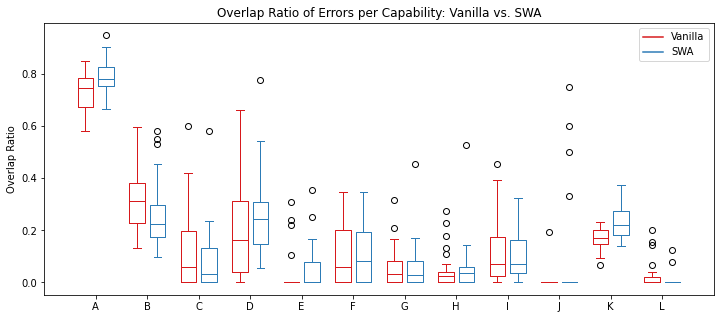

In [16]:
# ticks = [keys_to_names[k] for k in all_keys]
ticks = [string.ascii_uppercase[i] for i in range(len(all_keys))]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(12, 5))

bpl = plt.boxplot(overlap_ratios_vanilla, positions=np.array(range(len(overlap_ratios_vanilla)))*2.0-0.4, widths=0.6)
bpr = plt.boxplot(overlap_ratios_swa, positions=np.array(range(len(overlap_ratios_swa)))*2.0+0.4, widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Vanilla')
plt.plot([], c='#2C7BB6', label='SWA')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.title("Overlap Ratio of Errors per Capability: Vanilla vs. SWA")
plt.ylabel("Overlap Ratio")
# plt.savefig("overlap_ratio_boxplot_rs10.eps", format="eps", bbox_inches='tight')

## Fleiss' Kappa

In [52]:
# Without RS0
swa_models = [rs1_swa, rs2_swa, rs3_swa, rs4_swa, rs5_swa, rs6_swa, rs7_swa, rs8_swa, rs9_swa]
non_swa_models = [rs1, rs2, rs3, rs4, rs5, rs6, rs7, rs8, rs9]

# With RS0
# swa_models = [rs0_swa, rs1_swa, rs2_swa, rs3_swa, rs4_swa, rs5_swa, rs6_swa, rs7_swa, rs8_swa, rs9_swa]
# non_swa_models = [rs0, rs1, rs2, rs3, rs4, rs5, rs6, rs7, rs8, rs9]

In [42]:
from nltk.metrics.agreement import AnnotationTask

### Get Fleiss' Kappa Values for Vanilla and SWA Models per CheckList Capability 
On an instance-level, we calculate the Fleiss' Kappa agreement scores per CheckList capability and make a comparison through a table. 

In [53]:
# Looks at individual mistakes, not case-level

def fleiss_kappa_checklist_tests(models, test_keys): 
    fleiss_kappa_values = {}
    for k in test_keys:
        triples = []
        idxs = []
        for model in models: 
            # If test is an INV or DIR
            if isinstance(model[1][k]["samples"][0], list): 
                # If test is a DIR
                if k == "add positive phrases" or k == "add negative phrases":                         
                    fail_idxs = [model[1][k]["samples"].index(fail) for fail in model[1][k]["failures"]]
                    for fail_idx in fail_idxs: 
                        # Get samples of failed test case that were against expectation
                        wrong_idxs = list(np.where(np.array(model[1][k]["expect_results"][fail_idx]) != 1.0)[0])
                        for wrong_idx in wrong_idxs: 
                            idxs.append((fail_idx, wrong_idx))
                else: 
                    # When test is an INV 
                    fail_idxs = [model[1][k]["samples"].index(fail) for fail in model[1][k]["failures"]]
                    for fail_idx in fail_idxs: 
                        fail_preds = model[1][k]["predictions"][fail_idx]
                        correct_pred = fail_preds[0]
                        # Get samples of failed test case that were not label-preserving
                        wrong_preds = list(np.where(np.array(fail_preds) != correct_pred)[0])
                        for pred_idx in wrong_preds: 
                            idxs.append((fail_idx, pred_idx))
            else:
                for fail_sample in model[1][k]["failures"]: 
                    idx = model[1][k]["samples"].index(fail_sample)
                    idxs.append(idx)
        idxs = list(set(idxs))
        for i, model in enumerate(models):
            # If test is an INV or DIR
            if isinstance(model[1][k]["samples"][0], list): 
                # If test is a DIR
                if k == "add positive phrases" or k == "add negative phrases":   
                    # Get if model passed or failed samples of a test case
                    preds = []
                    for idx_pair in idxs:
                        if model[1][k]["passed"][idx_pair[0]]: 
                            pred = "passed"
                        elif model[1][k]["expect_results"][idx_pair[0]][idx_pair[1]] != 1.0: 
                            pred = "not passed"
                        else: 
                            pred = "passed"
                        preds.append(pred)
                else: 
                    # If test is an INV
                    preds = []
                    for idx_pair in idxs: 
                        # Get if prediction flipped or not
                        pred = "same"
                        if model[1][k]["predictions"][idx_pair[0]][idx_pair[1]] != model[1][k]["predictions"][idx_pair[0]][0]:
                            pred = "flip"
                        preds.append(pred)
            else:
                preds = [model[1][k]["predictions"][idx] for idx in idxs]
            for j, pred in enumerate(flat(preds)): 
                triples.append((i, j, pred))
        fleiss_kappa = np.nan
        try: 
            fleiss_kappa = AnnotationTask(data=triples).multi_kappa()
            fleiss_kappa_values[keys_to_names[k]] = fleiss_kappa
        except ZeroDivisionError: 
            print(f"Skipping {k} because of no errors.")
            continue
    return fleiss_kappa_values
            
fleiss_kappa_non_swa = fleiss_kappa_checklist_tests(non_swa_models, rs0[1].keys())
fleiss_kappa_swa = fleiss_kappa_checklist_tests(swa_models, rs0[1].keys())

Skipping Movie sentiments because of no errors.
Skipping Single positive words because of no errors.
Skipping Single negative words because of no errors.
Skipping Sentiment-laden words in context because of no errors.
Skipping Movie sentiments because of no errors.
Skipping Single positive words because of no errors.
Skipping Single negative words because of no errors.
Skipping Sentiment-laden words in context because of no errors.


In [20]:
fleiss_kappa_non_swa

{'Add Positive Phrases': 0.0,
 'Add Negative Phrases': -0.03132821962050871,
 'Negation of Positive Sentences': 0.02963976288189659,
 'Negation of Positive, neutral words in the middle': 0.10763748144150634,
 'Movie Genre Specific Sentiments': 0.5818529266048554,
 'Change Names': -0.09169411197686722,
 'Negative Names - Positive Instances': 0.006974716652136209,
 'Positive Names - Negative Instances': -0.06916168288565976,
 'Negative Names - Negative Instances': -0.08248633580254701,
 'Positive Names - Positive Instances': 0.01270424441651401,
 'Change Movie Industries': -0.07250292713680948,
 'Movie Industries Sentiments': 0.0,
 'Change Neutral Words': 0.08730614003033613,
 'Temporal Sentiment Change': 0.24865296428911574}

In [21]:
fleiss_kappa_swa

{'Add Positive Phrases': 0.0,
 'Add Negative Phrases': -0.06205250596658627,
 'Negation of Positive Sentences': 0.02044768121590019,
 'Negation of Positive, neutral words in the middle': 0.1422191462411371,
 'Movie Genre Specific Sentiments': 0.6601377336553083,
 'Change Names': -0.08409565077836505,
 'Negative Names - Positive Instances': 0.006020995142915444,
 'Positive Names - Negative Instances': -0.07622577045476447,
 'Negative Names - Negative Instances': -0.06914074176266347,
 'Positive Names - Positive Instances': 0.03519639588906075,
 'Change Movie Industries': -0.05223880597014998,
 'Movie Industries Sentiments': 0.0,
 'Change Neutral Words': 0.13575920653296225,
 'Temporal Sentiment Change': 0.2909263075809066}

In [22]:
# Without RS0
fleiss_kappa_df = pd.DataFrame([fleiss_kappa_non_swa, fleiss_kappa_swa], index=["Vanilla", "SWA"]).T
fleiss_kappa_df["Difference"] = fleiss_kappa_df["SWA"] - fleiss_kappa_df["Vanilla"]
print(fleiss_kappa_df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &   Vanilla &       SWA &  Difference \\
\midrule
Add Positive Phrases                              &  0.000000 &  0.000000 &    0.000000 \\
Add Negative Phrases                              & -0.031328 & -0.062053 &   -0.030724 \\
Negation of Positive Sentences                    &  0.029640 &  0.020448 &   -0.009192 \\
Negation of Positive, neutral words in the middle &  0.107637 &  0.142219 &    0.034582 \\
Movie Genre Specific Sentiments                   &  0.581853 &  0.660138 &    0.078285 \\
Change Names                                      & -0.091694 & -0.084096 &    0.007598 \\
Negative Names - Positive Instances               &  0.006975 &  0.006021 &   -0.000954 \\
Positive Names - Negative Instances               & -0.069162 & -0.076226 &   -0.007064 \\
Negative Names - Negative Instances               & -0.082486 & -0.069141 &    0.013346 \\
Positive Names - Positive Instances               &  0.012704 &  0.035196 &    0.022492 \\
Change

In [16]:
# With RS0
fleiss_kappa_df = pd.DataFrame([fleiss_kappa_non_swa, fleiss_kappa_swa], index=["Vanilla", "SWA"]).T
fleiss_kappa_df["Difference"] = fleiss_kappa_df["SWA"] - fleiss_kappa_df["Vanilla"]
print(fleiss_kappa_df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &   Vanilla &       SWA &  Difference \\
\midrule
Sentiment-laden Words in Context                  &  0.000000 &  0.000000 &    0.000000 \\
Add Positive Phrases                              & -0.058824 & -0.043796 &    0.015028 \\
Add Negative Phrases                              & -0.051318 & -0.021295 &    0.030023 \\
Negation of Positive Sentences                    &  0.048956 &  0.031777 &   -0.017179 \\
Negation of Positive, neutral words in the middle &  0.132425 &  0.150507 &    0.018082 \\
Movie Genre Specific Sentiments                   &  0.583256 &  0.590209 &    0.006952 \\
Change Names                                      & -0.046527 & -0.074413 &   -0.027887 \\
Negative Names - Positive Instances               & -0.007656 & -0.007270 &    0.000386 \\
Positive Names - Negative Instances               & -0.044586 & -0.067630 &   -0.023044 \\
Negative Names - Negative Instances               & -0.046272 & -0.061678 &   -0.015406 \\
Positi